Setup ultralytics

In [1]:
!pip install --upgrade pip

!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -e .

from ultralytics import YOLO
from PIL import Image

fatal: destination path 'ultralytics' already exists and is not an empty directory.


/opt/app-root/lib64/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/opt/app-root/src/ultralytics
Obtaining file:///opt/app-root/src/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.69-0.editable-py3-none-any.whl size=22701 sha256=0d447b9dc4ffee5a4e24190e065dbb974f998dc7f844198af075a7be4b9d772b
  Stored in directory: /tmp/pip-ephem-wheel-cache-_nau5mh7/wheels/98/44/90/a2d911b163e35065ac7457ca53e2c05388ab1bb689d1bf4b0a
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.69
    Uninstalling ultralytics-8.3.69:
      Successfully uninstalled ultralytics-8.3.69


Load model and import dataset  # load a pretrained model (recommended for training)

In [2]:
model = YOLO("yolo11n.pt")

In [3]:
!nvidia-smi

Fri Jan 31 05:03:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L40S                    On  |   00000000:23:00.0 Off |                    0 |
| N/A   67C    P8             45W /  350W |       1MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Import dataset (if not found) and train the model

In [4]:
#model.train(data='/opt/app-root/src/safari-demo/dataset/data.yaml', epochs=5, imgsz=640, batch=16)
results = model.train(data="african-wildlife.yaml", epochs=5, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.69 🚀 Python-3.11.7 torch-2.4.1+cu121 CUDA:0 (NVIDIA L40S, 45589MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=african-wildlife.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning /opt/app-root/src/datasets/african-wildlife/train/labels.cache... 1052 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1052/1052 [00:00<?, ?it/s]
val: Scanning /opt/app-root/src/datasets/african-wildlife/valid/labels.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]


Plotting labels to /opt/app-root/src/ultralytics/runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /opt/app-root/src/ultralytics/runs/detect/train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.48G     0.8458      2.582      1.231         42        640: 100%|██████████| 66/66 [00:04<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.15it/s]


                   all        225        379      0.632      0.677      0.693      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5       2.5G     0.8999      1.589      1.251         36        640: 100%|██████████| 66/66 [00:03<00:00, 17.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.52it/s]


                   all        225        379      0.565      0.556       0.59      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.46G     0.9031      1.388      1.247         56        640: 100%|██████████| 66/66 [00:03<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.33it/s]


                   all        225        379      0.717      0.701      0.763      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.39G     0.8622      1.227      1.206         52        640: 100%|██████████| 66/66 [00:03<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.90it/s]


                   all        225        379       0.87      0.798       0.88      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.42G     0.7887      1.089      1.155         48        640: 100%|██████████| 66/66 [00:03<00:00, 17.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.12it/s]


                   all        225        379      0.907      0.877      0.933      0.753

5 epochs completed in 0.008 hours.
Optimizer stripped from /opt/app-root/src/ultralytics/runs/detect/train4/weights/last.pt, 5.5MB
Optimizer stripped from /opt/app-root/src/ultralytics/runs/detect/train4/weights/best.pt, 5.5MB

Validating /opt/app-root/src/ultralytics/runs/detect/train4/weights/best.pt...
Ultralytics 8.3.69 🚀 Python-3.11.7 torch-2.4.1+cu121 CUDA:0 (NVIDIA L40S, 45589MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.78it/s]


                   all        225        379      0.907      0.877      0.933      0.753
               buffalo         62         89       0.94      0.878      0.964      0.794
              elephant         53         91      0.805       0.91      0.897      0.701
                 rhino         55         85      0.928      0.914      0.936        0.8
                 zebra         59        114      0.953      0.807      0.935      0.719
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /opt/app-root/src/ultralytics/runs/detect/train4


Inference using the model

In [12]:
model = YOLO("/opt/app-root/src/ultralytics/runs/detect/train4/weights/best.pt")  # load a fine-tuned model
#results = model.predict("https://ultralytics.com/assets/african-wildlife-sample.jpg", save=True)
results = model.predict("http://10.76.46.219/jpocp/genai/sample1.jpg", save=True)


Found http://10.76.46.219/jpocp/genai/sample1.jpg locally at sample1.jpg
image 1/1 /opt/app-root/src/ultralytics/sample1.jpg: 288x640 4 rhinos, 5.4ms
Speed: 1.5ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)
Results saved to /opt/app-root/src/ultralytics/runs/detect/predict8


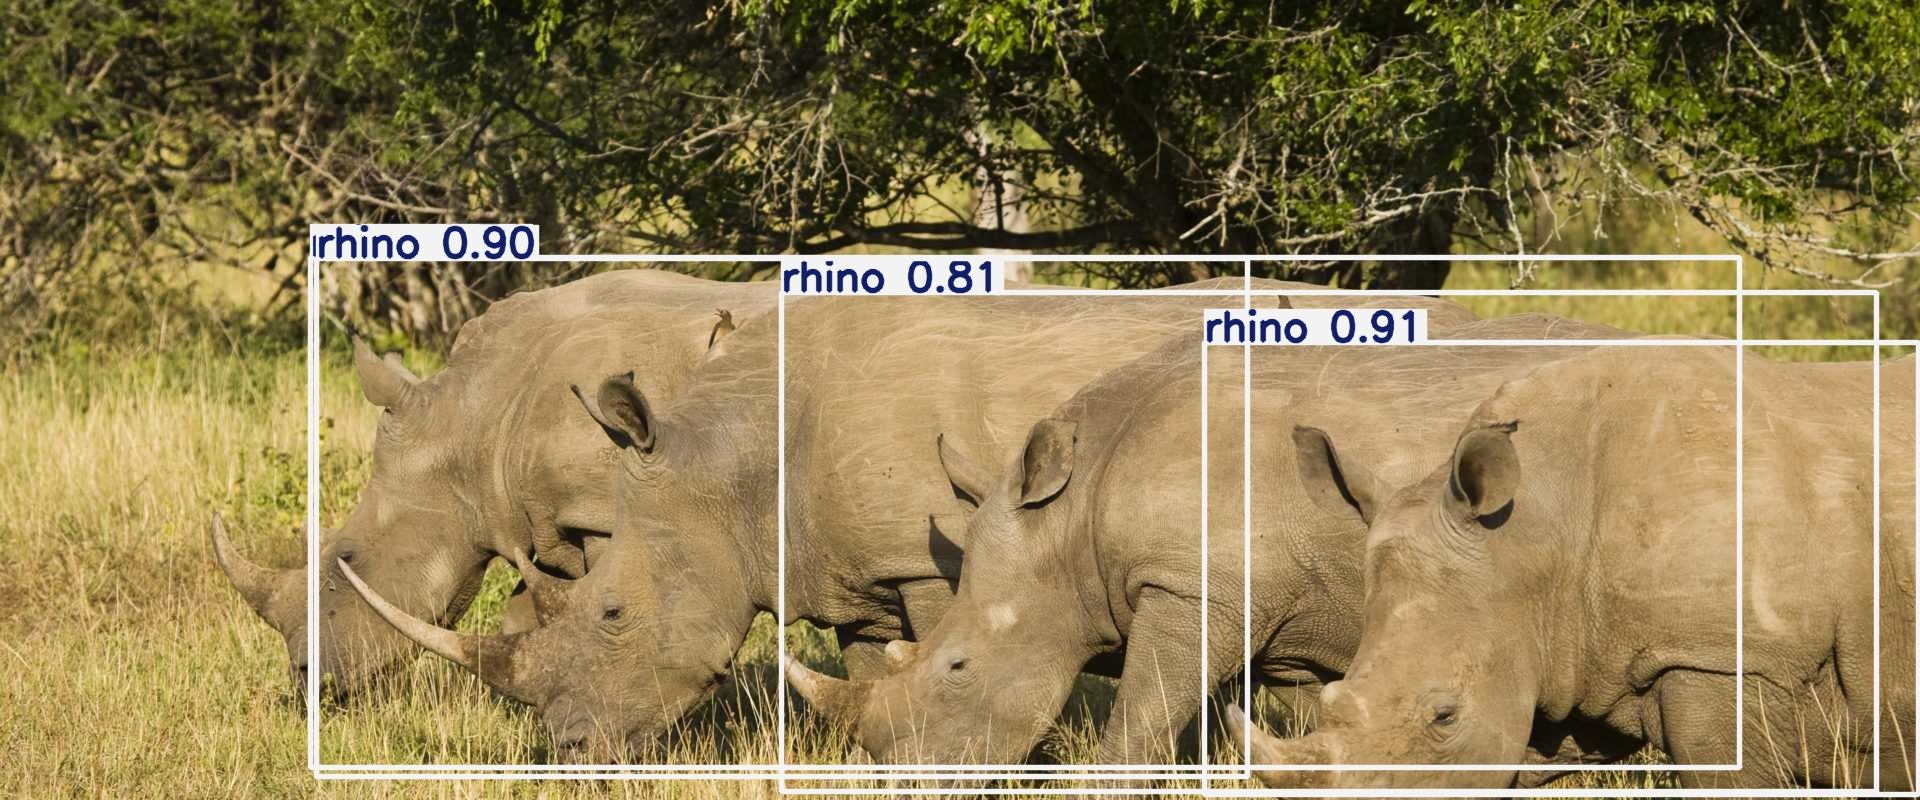

In [13]:
#Image.open('/opt/app-root/src/ultralytics/runs/detect/predict5/african-wildlife-sample.jpg')
Image.open('/opt/app-root/src/ultralytics/runs/detect/predict8/sample1.jpg')